# **PREPARATION**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA WRANGLING**

## **Data Gathering**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_iris = pd.read_csv('/content/drive/My Drive/Colab Notebooks/iris/Iris.csv')

In [5]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## **Assessing Data**

**Missing value**

In [7]:
df_iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


**Invalid Value (hanya sebagai contoh)**

In [8]:
invalid_values = df_iris[df_iris['SepalLengthCm']>10]
print ('Invalid Values: \n', invalid_values)

Invalid Values: 
 Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


**Duplicate Data**

In [9]:
df_iris.duplicated().sum()

0

**Inaccurate Value (hanya sebagai contoh)**

In [10]:
inaccurate_values = df_iris[(df_iris['PetalLengthCm'] < 1) | (df_iris['PetalWidthCm'] > 10 )]
print('Inaccurate Values: \n', inaccurate_values)

Inaccurate Values: 
 Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


**Inconsistent Value (hanya sebagai contoh)**

In [11]:
# Contoh: Cek konsistensi format tanggal

# df['Date'] = ['2023-01-01', '01-02-2023', '2023/03/01', '2023-04-01', '2023-05-01']
# inconsistent_dates = df[~df['Date'].str.match(r'\d{4}-\d{2}-\d{2}')]
# print("Inconsistent Dates:\n", inconsistent_dates)

**Outlier**

In [12]:
Q1 = df_iris['SepalLengthCm'].quantile(0.25)
Q3 = df_iris['SepalLengthCm'].quantile(0.75)
IQR = Q3 - Q1

In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')
print(f'Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}')

Q1: 5.1, Q3: 6.4, IQR: 1.3000000000000007
Batas Bawah: 3.1499999999999986, Batas Atas: 8.350000000000001


In [15]:
outliers_SepalLength = df_iris[(df_iris['SepalLengthCm'] < lower_bound) | (df_iris['SepalLengthCm'] > upper_bound)]

In [16]:
print('Outliers di Sepal Length:\n', outliers_SepalLength)

Outliers di Sepal Length:
 Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


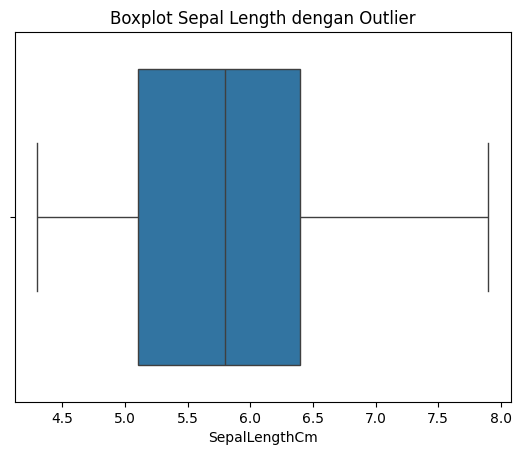

In [17]:
sns.boxplot(x=df_iris['SepalLengthCm'])
plt.title('Boxplot Sepal Length dengan Outlier')
plt.show()

## **Cleaning Data**

### Teknik untuk mengatasi Missing Value

**Dropping**

In [18]:
# df_iris.dropna(axis=0, inplace=True)

**Imputation**

In [19]:
# df_iris.PetalLengthCm.fillna(value=df_iris.PetalLengthCm.mean(), inplace=True)

**Interpolation**

In [20]:
# df_iris.PetalLengthCm.interpolate(method='linear', limit_direction='forward', inplace=True)

### Teknik untuk mengatasi Outlier

**Drop**

In [21]:
# df_iris.drop(df_iris[outliers_SepalLength].index, inplace=True)

**Imputation**

In [22]:
# df_iris.mask(cond=outliers_SepalLength, other=upper_bound, axis=1, inplace=True)

# df_iris["SepalLengthCm"] = df_iris["SepalLengthCm"].where(~outliers_SepalLength, upper_bound, axis=1)

### Teknik untuk mengatasi Duplicate Data

In [23]:
# df_iris.drop_duplicates(inplace=True)

# **EXPLORATORY DATA ANALYSIS**

### **UNIVARIATE ANALYSIS**

Bagaimana distribusi dari setiap fitur (sepal length, sepal width, petal length, petal width) untuk setiap spesies (setosa, versicolor, virginica)?

In [24]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df_setosa = df_iris[df_iris['Species'] == 'Iris-setosa']
df_versicolor = df_iris[df_iris['Species'] == 'Iris-versicolor']
df_virginica = df_iris[df_iris['Species'] == 'Iris-virginica']

print('Setosa Species:')
print(df_setosa.head())

print('\nVersicolor Species:')
print(df_versicolor.head())

print('\nVirginica Species:')
print(df_virginica.head())

Setosa Species:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Versicolor Species:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
50  51            7.0           3.2            4.7           1.4   
51  52            6.4           3.2            4.5           1.5   
52  53            6.9           3.1            4.9           1.5   
53  54            5.5           2.3            4.0           1.3   
54  55            6.5           2.8            4.6           1.5   

            Species  
50  Iris-versicolor  
51  Iris-versicolor  
52  Iris-versicolor  
53  

In [26]:
df_sepal_length_setosa = df_setosa[['Id', 'SepalLengthCm', 'Species']]
df_sepal_length_versicolor = df_versicolor[['Id', 'SepalLengthCm', 'Species']]
df_sepal_length_virginica = df_virginica[['Id', 'SepalLengthCm', 'Species']]

print('DataFrame Setosa (Sepal Length)')
print(df_sepal_length_setosa.head())

print('\nDataFrame Versicolor (Sepal Length)')
print(df_sepal_length_versicolor.head())

print('\nDataFrame Virginica (Sepal Length)')
print(df_sepal_length_virginica.head())

DataFrame Setosa (Sepal Length)
   Id  SepalLengthCm      Species
0   1            5.1  Iris-setosa
1   2            4.9  Iris-setosa
2   3            4.7  Iris-setosa
3   4            4.6  Iris-setosa
4   5            5.0  Iris-setosa

DataFrame Versicolor (Sepal Length)
    Id  SepalLengthCm          Species
50  51            7.0  Iris-versicolor
51  52            6.4  Iris-versicolor
52  53            6.9  Iris-versicolor
53  54            5.5  Iris-versicolor
54  55            6.5  Iris-versicolor

DataFrame Virginica (Sepal Length)
      Id  SepalLengthCm         Species
100  101            6.3  Iris-virginica
101  102            5.8  Iris-virginica
102  103            7.1  Iris-virginica
103  104            6.3  Iris-virginica
104  105            6.5  Iris-virginica


In [27]:
df_sepal_width_setosa = df_setosa[['Id', 'SepalWidthCm', 'Species']]
df_sepal_width_versicolor = df_versicolor[['Id', 'SepalWidthCm', 'Species']]
df_sepal_width_virginica = df_virginica[['Id', 'SepalWidthCm', 'Species']]

print('DataFrame Setosa (Sepal Width)')
print(df_sepal_width_setosa.head())

print('\nDataFrame Versicolor (Sepal Width)')
print(df_sepal_width_versicolor.head())

print('\nDataFrame Virginica (Sepal Width)')
print(df_sepal_width_virginica.head())

DataFrame Setosa (Sepal Width)
   Id  SepalWidthCm      Species
0   1           3.5  Iris-setosa
1   2           3.0  Iris-setosa
2   3           3.2  Iris-setosa
3   4           3.1  Iris-setosa
4   5           3.6  Iris-setosa

DataFrame Versicolor (Sepal Width)
    Id  SepalWidthCm          Species
50  51           3.2  Iris-versicolor
51  52           3.2  Iris-versicolor
52  53           3.1  Iris-versicolor
53  54           2.3  Iris-versicolor
54  55           2.8  Iris-versicolor

DataFrame Virginica (Sepal Width)
      Id  SepalWidthCm         Species
100  101           3.3  Iris-virginica
101  102           2.7  Iris-virginica
102  103           3.0  Iris-virginica
103  104           2.9  Iris-virginica
104  105           3.0  Iris-virginica


In [28]:
df_petal_length_setosa = df_setosa[['Id', 'PetalLengthCm', 'Species']]
df_petal_length_versicolor = df_versicolor[['Id', 'PetalLengthCm', 'Species']]
df_petal_length_virginica = df_virginica[['Id', 'PetalLengthCm', 'Species']]

print('DataFrame Setosa (Petal Length)')
print(df_petal_length_setosa.head())

print('\nDataFrame Versicolor (Petal Length)')
print(df_petal_length_versicolor.head())

print('\nDataFrame Virginica (Petal Length)')
print(df_petal_length_virginica.head())

DataFrame Setosa (Petal Length)
   Id  PetalLengthCm      Species
0   1            1.4  Iris-setosa
1   2            1.4  Iris-setosa
2   3            1.3  Iris-setosa
3   4            1.5  Iris-setosa
4   5            1.4  Iris-setosa

DataFrame Versicolor (Petal Length)
    Id  PetalLengthCm          Species
50  51            4.7  Iris-versicolor
51  52            4.5  Iris-versicolor
52  53            4.9  Iris-versicolor
53  54            4.0  Iris-versicolor
54  55            4.6  Iris-versicolor

DataFrame Virginica (Petal Length)
      Id  PetalLengthCm         Species
100  101            6.0  Iris-virginica
101  102            5.1  Iris-virginica
102  103            5.9  Iris-virginica
103  104            5.6  Iris-virginica
104  105            5.8  Iris-virginica


In [29]:
df_petal_width_setosa = df_setosa[['Id', 'PetalWidthCm', 'Species']]
df_petal_width_versicolor = df_versicolor[['Id', 'PetalWidthCm', 'Species']]
df_petal_width_virginica = df_virginica[['Id', 'PetalWidthCm', 'Species']]

print('DataFrame Setosa (Petal Width)')
print(df_petal_width_setosa.head())

print('\nDataFrame Versicolor (Petal Width)')
print(df_petal_width_versicolor.head())

print('\nDataFrame Virginica (Petal Width)')
print(df_petal_width_virginica.head())

DataFrame Setosa (Petal Width)
   Id  PetalWidthCm      Species
0   1           0.2  Iris-setosa
1   2           0.2  Iris-setosa
2   3           0.2  Iris-setosa
3   4           0.2  Iris-setosa
4   5           0.2  Iris-setosa

DataFrame Versicolor (Petal Width)
    Id  PetalWidthCm          Species
50  51           1.4  Iris-versicolor
51  52           1.5  Iris-versicolor
52  53           1.5  Iris-versicolor
53  54           1.3  Iris-versicolor
54  55           1.5  Iris-versicolor

DataFrame Virginica (Petal Width)
      Id  PetalWidthCm         Species
100  101           2.5  Iris-virginica
101  102           1.9  Iris-virginica
102  103           2.1  Iris-virginica
103  104           1.8  Iris-virginica
104  105           2.2  Iris-virginica


      Id  SepalLengthCm         Species
0      1            5.1     Iris-setosa
1      2            4.9     Iris-setosa
2      3            4.7     Iris-setosa
3      4            4.6     Iris-setosa
4      5            5.0     Iris-setosa
..   ...            ...             ...
145  146            6.7  Iris-virginica
146  147            6.3  Iris-virginica
147  148            6.5  Iris-virginica
148  149            6.2  Iris-virginica
149  150            5.9  Iris-virginica

[150 rows x 3 columns]


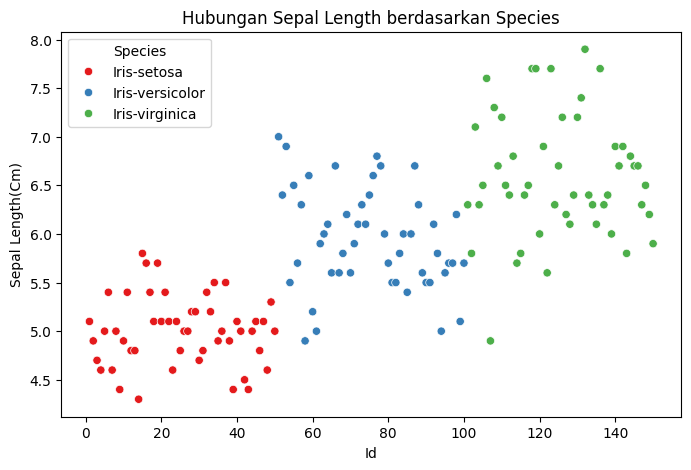

In [30]:
df_all_SepalLength = pd.concat([df_sepal_length_setosa, df_sepal_length_versicolor, df_sepal_length_virginica])
print(df_all_SepalLength)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_all_SepalLength, x='Id', y='SepalLengthCm', hue='Species', palette='Set1')

plt.title("Hubungan Sepal Length berdasarkan Species")
plt.xlabel('Id')
plt.ylabel("Sepal Length(Cm)")
plt.legend(title='Species')

plt.show()

      Id  SepalWidthCm         Species
0      1           3.5     Iris-setosa
1      2           3.0     Iris-setosa
2      3           3.2     Iris-setosa
3      4           3.1     Iris-setosa
4      5           3.6     Iris-setosa
..   ...           ...             ...
145  146           3.0  Iris-virginica
146  147           2.5  Iris-virginica
147  148           3.0  Iris-virginica
148  149           3.4  Iris-virginica
149  150           3.0  Iris-virginica

[150 rows x 3 columns]


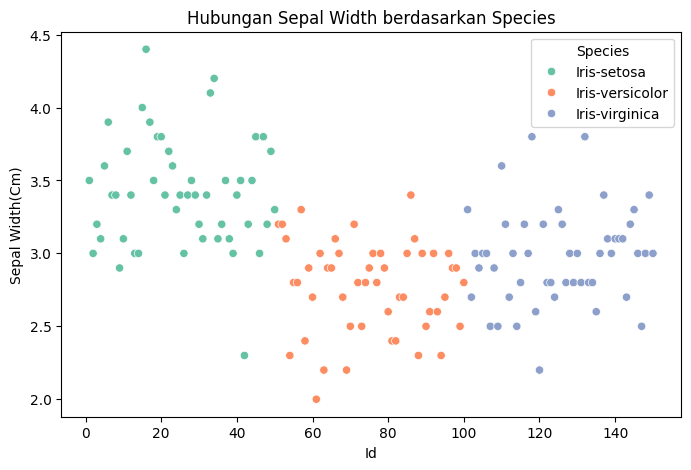

In [31]:
df_all_SepalWidth = pd.concat([df_sepal_width_setosa, df_sepal_width_versicolor, df_sepal_width_virginica])
print(df_all_SepalWidth)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_all_SepalWidth, x='Id', y='SepalWidthCm', hue='Species', palette='Set2')

plt.title("Hubungan Sepal Width berdasarkan Species")
plt.xlabel('Id')
plt.ylabel("Sepal Width(Cm)")
plt.legend(title='Species')

plt.show()

      Id  PetalLengthCm         Species
0      1            1.4     Iris-setosa
1      2            1.4     Iris-setosa
2      3            1.3     Iris-setosa
3      4            1.5     Iris-setosa
4      5            1.4     Iris-setosa
..   ...            ...             ...
145  146            5.2  Iris-virginica
146  147            5.0  Iris-virginica
147  148            5.2  Iris-virginica
148  149            5.4  Iris-virginica
149  150            5.1  Iris-virginica

[150 rows x 3 columns]


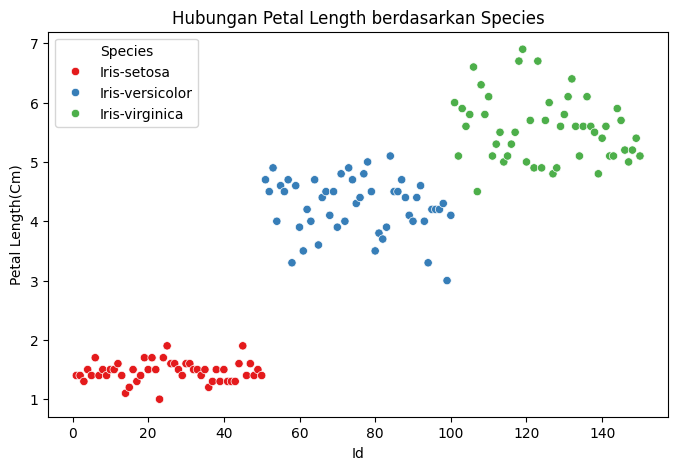

In [32]:
df_all_PetalLength = pd.concat([df_petal_length_setosa, df_petal_length_versicolor, df_petal_length_virginica])
print(df_all_PetalLength)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_all_PetalLength, x='Id', y='PetalLengthCm', hue='Species', palette='Set1')

plt.title("Hubungan Petal Length berdasarkan Species")
plt.xlabel('Id')
plt.ylabel("Petal Length(Cm)")
plt.legend(title='Species')

plt.show()

      Id  PetalWidthCm         Species
0      1           0.2     Iris-setosa
1      2           0.2     Iris-setosa
2      3           0.2     Iris-setosa
3      4           0.2     Iris-setosa
4      5           0.2     Iris-setosa
..   ...           ...             ...
145  146           2.3  Iris-virginica
146  147           1.9  Iris-virginica
147  148           2.0  Iris-virginica
148  149           2.3  Iris-virginica
149  150           1.8  Iris-virginica

[150 rows x 3 columns]


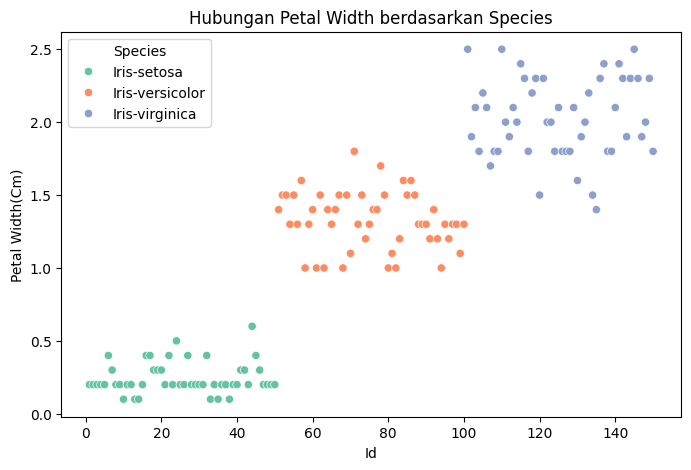

In [33]:
df_all_PetalWidth = pd.concat([df_petal_width_setosa, df_petal_width_versicolor, df_petal_width_virginica])
print(df_all_PetalWidth)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_all_PetalWidth, x='Id', y='PetalWidthCm', hue='Species', palette='Set2')

plt.title("Hubungan Petal Width berdasarkan Species")
plt.xlabel('Id')
plt.ylabel("Petal Width(Cm)")
plt.legend(title='Species')

plt.show()

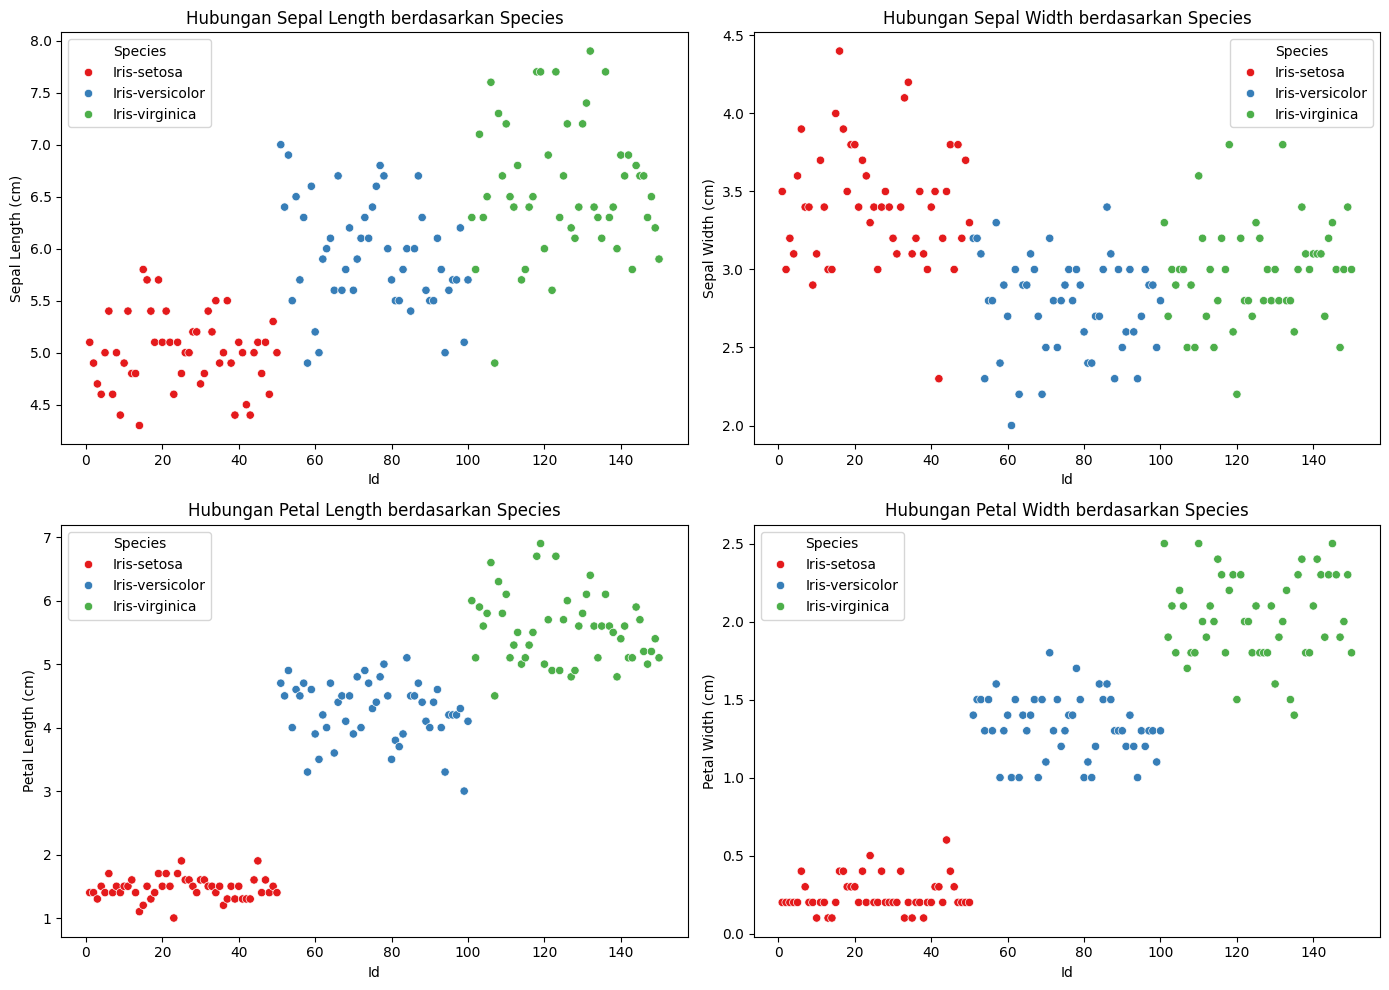

In [34]:
df_all_SepalLength = pd.concat([df_sepal_length_setosa, df_sepal_length_versicolor, df_sepal_length_virginica])
df_all_SepalWidth = pd.concat([df_sepal_width_setosa, df_sepal_width_versicolor, df_sepal_width_virginica])
df_all_PetalLength = pd.concat([df_petal_length_setosa, df_petal_length_versicolor, df_petal_length_virginica])
df_all_PetalWidth = pd.concat([df_petal_width_setosa, df_petal_width_versicolor, df_petal_width_virginica])

# Membuat figure dengan 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 baris, 2 kolom

# === Plot 1: Scatter Plot Sepal Length ===
sns.scatterplot(data=df_all_SepalLength, x='Id', y='SepalLengthCm', hue='Species', palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title("Hubungan Sepal Length berdasarkan Species")
axes[0, 0].set_xlabel("Id")
axes[0, 0].set_ylabel("Sepal Length (cm)")

# === Plot 2: Scatter Plot Sepal Width ===
sns.scatterplot(data=df_all_SepalWidth, x='Id', y='SepalWidthCm', hue='Species', palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title("Hubungan Sepal Width berdasarkan Species")
axes[0, 1].set_xlabel("Id")
axes[0, 1].set_ylabel("Sepal Width (cm)")

# === Plot 3: Scatter Plot Petal Length ===
sns.scatterplot(data=df_all_PetalLength, x='Id', y='PetalLengthCm', hue='Species', palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title("Hubungan Petal Length berdasarkan Species")
axes[1, 0].set_xlabel("Id")
axes[1, 0].set_ylabel("Petal Length (cm)")

# === Plot 4: Scatter Plot Petal Width ===
sns.scatterplot(data=df_all_PetalWidth, x='Id', y='PetalWidthCm', hue='Species', palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title("Hubungan Petal Width berdasarkan Species")
axes[1, 1].set_xlabel("Id")
axes[1, 1].set_ylabel("Petal Width (cm)")

# Menyesuaikan layout agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

### **BIVARIATE ANALYSIS**

Apakah ada korelasi yang kuat antara fitur-fitur seperti sepal length dan petal length?

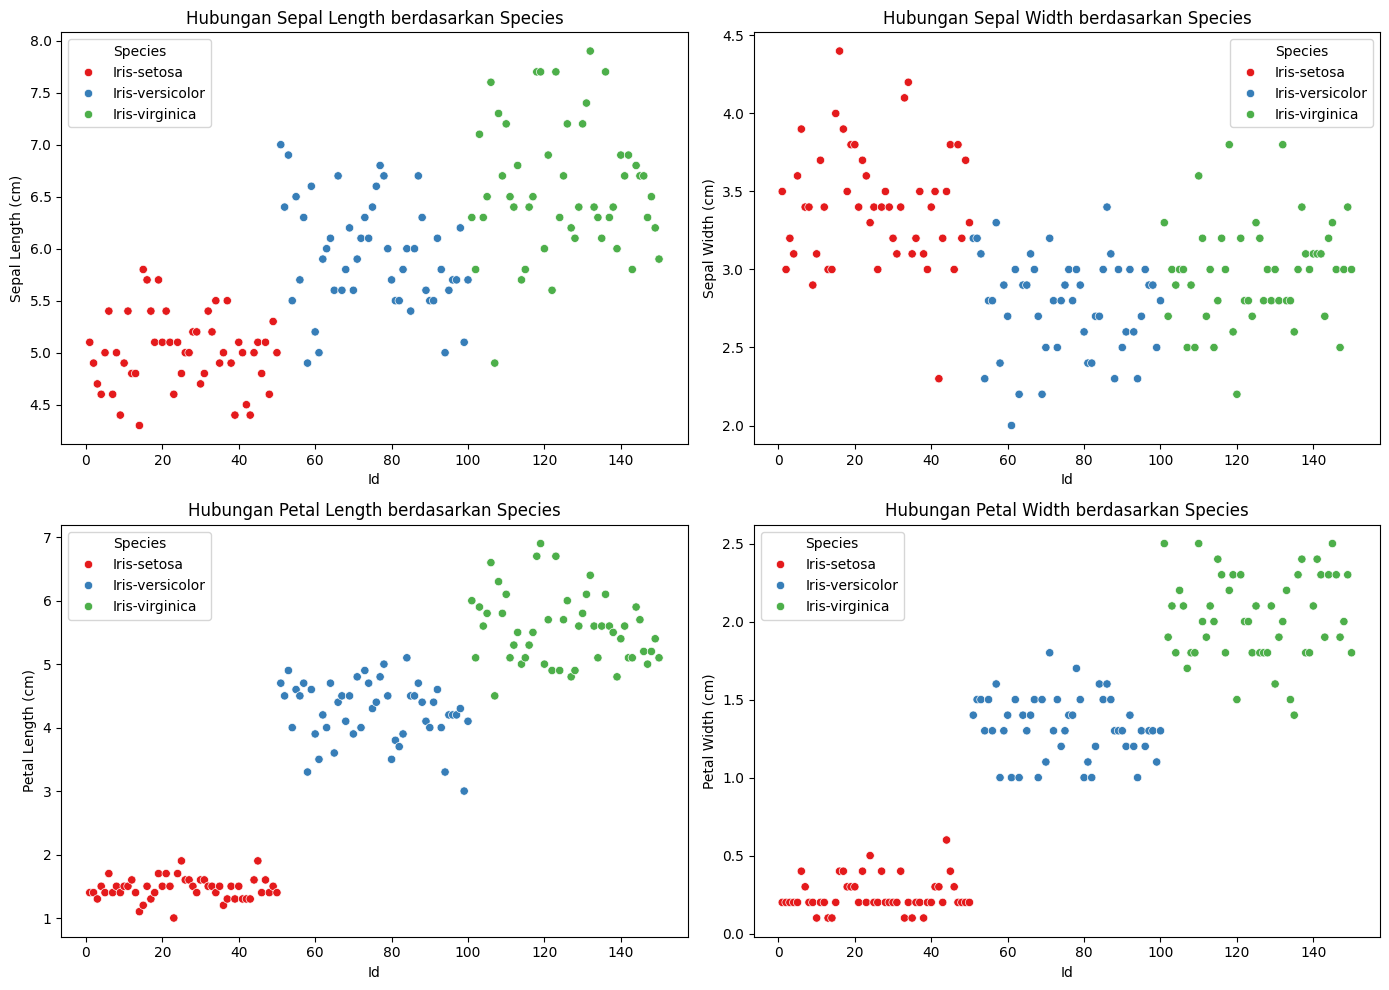

In [35]:
df_all_SepalLength = pd.concat([df_sepal_length_setosa, df_sepal_length_versicolor, df_sepal_length_virginica])
df_all_SepalWidth = pd.concat([df_sepal_width_setosa, df_sepal_width_versicolor, df_sepal_width_virginica])
df_all_PetalLength = pd.concat([df_petal_length_setosa, df_petal_length_versicolor, df_petal_length_virginica])
df_all_PetalWidth = pd.concat([df_petal_width_setosa, df_petal_width_versicolor, df_petal_width_virginica])

# Membuat figure dengan 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 baris, 2 kolom

# === Plot 1: Scatter Plot Sepal Length ===
sns.scatterplot(data=df_all_SepalLength, x='Id', y='SepalLengthCm', hue='Species', palette='Set1', ax=axes[0, 0])
axes[0, 0].set_title("Hubungan Sepal Length berdasarkan Species")
axes[0, 0].set_xlabel("Id")
axes[0, 0].set_ylabel("Sepal Length (cm)")

# === Plot 2: Scatter Plot Sepal Width ===
sns.scatterplot(data=df_all_SepalWidth, x='Id', y='SepalWidthCm', hue='Species', palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title("Hubungan Sepal Width berdasarkan Species")
axes[0, 1].set_xlabel("Id")
axes[0, 1].set_ylabel("Sepal Width (cm)")

# === Plot 3: Scatter Plot Petal Length ===
sns.scatterplot(data=df_all_PetalLength, x='Id', y='PetalLengthCm', hue='Species', palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title("Hubungan Petal Length berdasarkan Species")
axes[1, 0].set_xlabel("Id")
axes[1, 0].set_ylabel("Petal Length (cm)")

# === Plot 4: Scatter Plot Petal Width ===
sns.scatterplot(data=df_all_PetalWidth, x='Id', y='PetalWidthCm', hue='Species', palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title("Hubungan Petal Width berdasarkan Species")
axes[1, 1].set_xlabel("Id")
axes[1, 1].set_ylabel("Petal Width (cm)")

# Menyesuaikan layout agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

Jika Anda membangun model klasifikasi sederhana (misalnya, decision tree atau logistic regression), fitur mana yang paling penting untuk membedakan spesies?

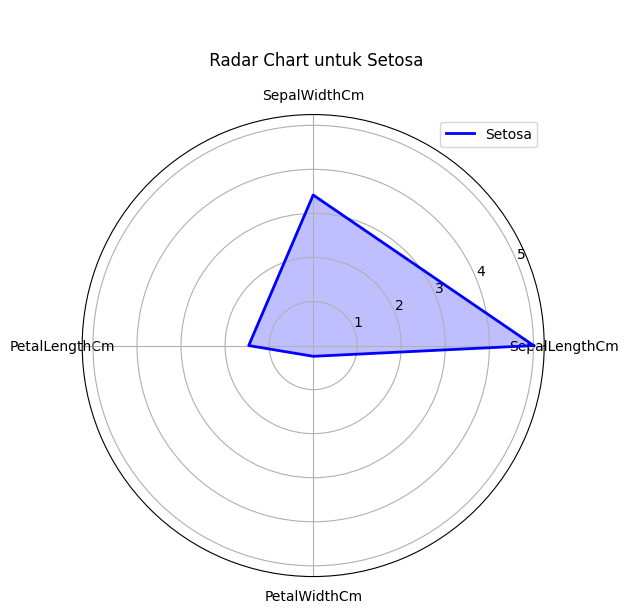

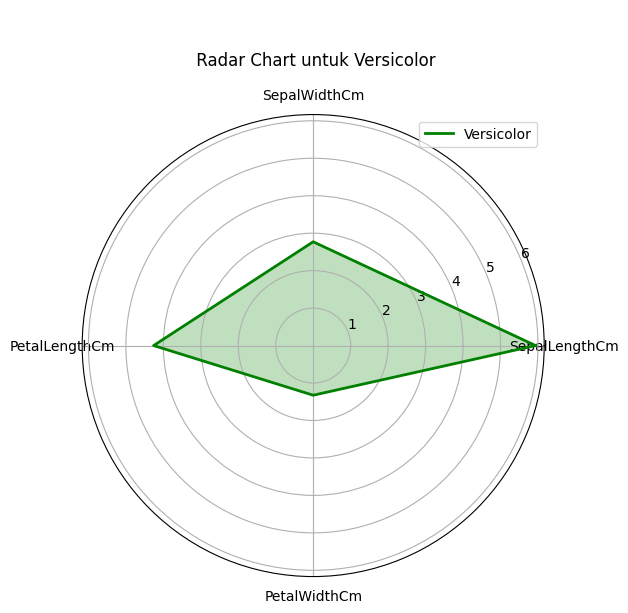

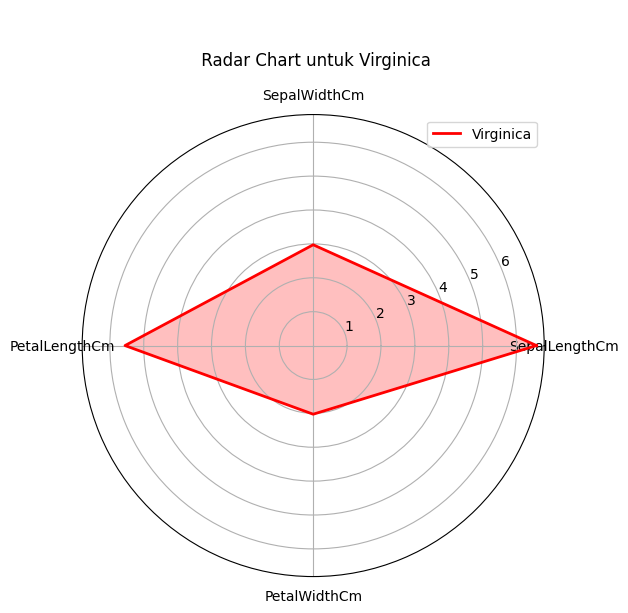

In [38]:
# List dataframe untuk tiap spesies
dfs = [df_setosa, df_versicolor, df_virginica]
species = ["Setosa", "Versicolor", "Virginica"]
colors = ["b", "g", "r"]

# Mengambil fitur tanpa 'Id' dan 'Species'
features = df_setosa.iloc[:, 1:-1].columns
num_vars = len(features)  # Jumlah fitur

# Membuat Radar Chart untuk setiap spesies
for df, sp, color in zip(dfs, species, colors):
    plt.figure(figsize=(6, 6))  # Ukuran grafik
    values = df[features].mean().values  # Menghitung rata-rata setiap fitur
    values = np.concatenate((values, [values[0]]))  # Menghubungkan titik awal dan akhir

    # Sudut untuk setiap fitur
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Menutup lingkaran

    # Plot Radar Chart
    ax = plt.subplot(111, polar=True)
    ax.fill(angles, values, color=color, alpha=0.25)  # Area di dalam radar chart
    ax.plot(angles, values, color=color, linewidth=2, label=sp)  # Garis utama

    # Menentukan label pada tiap sumbu
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)

    # Menampilkan legenda
    plt.title(f"\n \n Radar Chart untuk {sp}\n \n")
    plt.legend()
    plt.show()

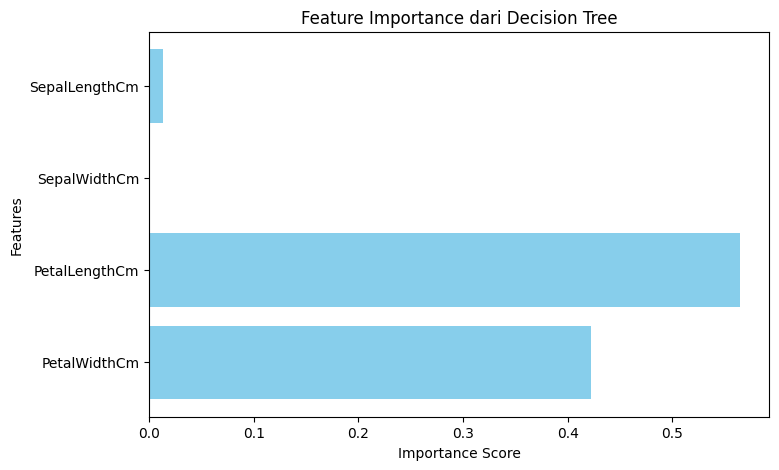

In [36]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Menggabungkan semua data
df_all = pd.concat([df_setosa, df_versicolor, df_virginica])

# Mengambil fitur dan label
X = df_all.iloc[:, 1:-1]  # Semua fitur tanpa 'Id' dan 'Species'
y = df_all['Species']  # Label spesies

# Melatih model Decision Tree sederhana
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Mendapatkan pentingnya fitur
importances = model.feature_importances_

# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(8, 5))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance dari Decision Tree")
plt.gca().invert_yaxis()
plt.show()

# **CONCLUSION**

Bagaimana distribusi dari setiap fitur (sepal length, sepal width, petal length, petal width) untuk setiap spesies (setosa, versicolor, virginica)?


> Distribusi setiap fitur untuk setiap spesies memiliki pola yang sama. Yaitu setosa memiliki ukuran yang paling kecil untuk semua fitur terkecuali fitur Sepal Width yang mana spesies Setosa memiliki ukuran yang lebih besar dibanding spesies lainnya. Disusul spesies Versicolor dengan ukuran lebih besar dari setosa untuk semua fitur terkecuali fitur Sepal Width yang mana spesies Versicolor memiliki ukuran yang lebih kecil dibanding spesies Setosa. Kemudian spesies Virginica yang memiliki ukuran paling besar untuk semua fitur terkecuali fitur Sepal Width yang mana memiliki ukuran paling kecil di antara semua spesies.

Apakah ada korelasi yang kuat antara fitur-fitur seperti sepal length dan petal length?



> Ya, ada. Fitur Sepal Length dan Petal Length untuk semua spesies memiliki pola ukuran yang sama. Yaitu spesies Setosa paling kecil, disusul spesies Versicolor yang lebih besar dari Setosa, dan Virginica yang lebih besar dari kedua spesies sebelumnya.


Jika Anda membangun model klasifikasi sederhana (misalnya, decision tree atau logistic regression), fitur mana yang paling penting untuk membedakan spesies?


> Tentu fitur tersebut adalah fitur Petal Length, Petal Width, dan Sepal Width. Kenapa Sepal Length tidak masuk? Hal ini dikarenakan ukuran Sepal Length antar spesies tidak memiliki perbedaan yang signifikan, bahkan cenderung sama. Hal ini tentu akan menyulitkan untuk proses klasifikasi di masa mendatang. Lain halnya dengan Petal Length, Petal Width, dan Sepal Width yang memiliki taraf perbedaan ukuran yang cukup signifikan untuk dapat dibedakan. Sehingga hal ini dapat membantu proses pengklasifikasian spesies di masa mendatang. Namun dari ketiga fitur ini, Petal Length dan Petal Width adalah fitur yang paling kuat untuk pengklasifikasian di masa mendatang.
